<a href="https://colab.research.google.com/github/DeependraParichha1004/NFL/blob/main/NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'


In [3]:
!kaggle competitions download -c nfl-big-data-bowl-2022

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 62.5MB/s]
 97% 244M/251M [00:03<00:00, 84.0MB/s]
100% 251M/251M [00:03<00:00, 72.4MB/s]
 95% 257M/272M [00:05<00:00, 64.1MB/s]
100% 272M/272M [00:05<00:00, 53.4MB/s]
  0% 0.00/304k [00:00<?, ?B/s]
100% 304k/304k [00:00<00:00, 20.1MB/s]
  0% 0.00/39.6k [00:00<?, ?B/s]
100% 39.6k/39.6k [00:00<00:00, 39.5MB/s]
  0% 0.00/795k [00:00<?, ?B/s]
100% 795k/795k [00:00<00:00, 12.7MB/s]
 99% 255M/259M [00:04<00:00, 83.8MB/s]
100% 259M/259M [00:04<00:00, 63.9MB/s]


# *Games Dataset*

In [4]:
games=pd.read_csv('games.csv')
games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN
...,...,...,...,...,...,...,...
759,2021010311,2020,17,01/03/2021,16:25:00,DEN,LV
760,2021010312,2020,17,01/03/2021,16:25:00,HOU,TEN
761,2021010313,2020,17,01/03/2021,16:25:00,IND,JAX
762,2021010314,2020,17,01/03/2021,16:25:00,LA,ARI


In [5]:
total=games['season'].value_counts().values.sum()
season=games['season'].value_counts().index
No=games['season'].value_counts().values

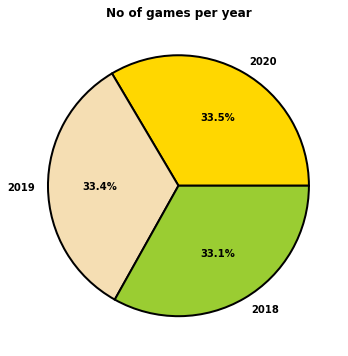

In [6]:
plt.figure(figsize=(8,6))
plt.pie(x=No,labels=season,colors=['gold','wheat','yellowgreen'],wedgeprops={'linewidth':2,'edgecolor':'k'},textprops={'fontweight':'bold'},autopct='%1.1f%%')
plt.title('No of games per year',fontdict={'fontweight':'bold'})
plt.show()

In [7]:
players=pd.read_csv('players.csv')
players

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


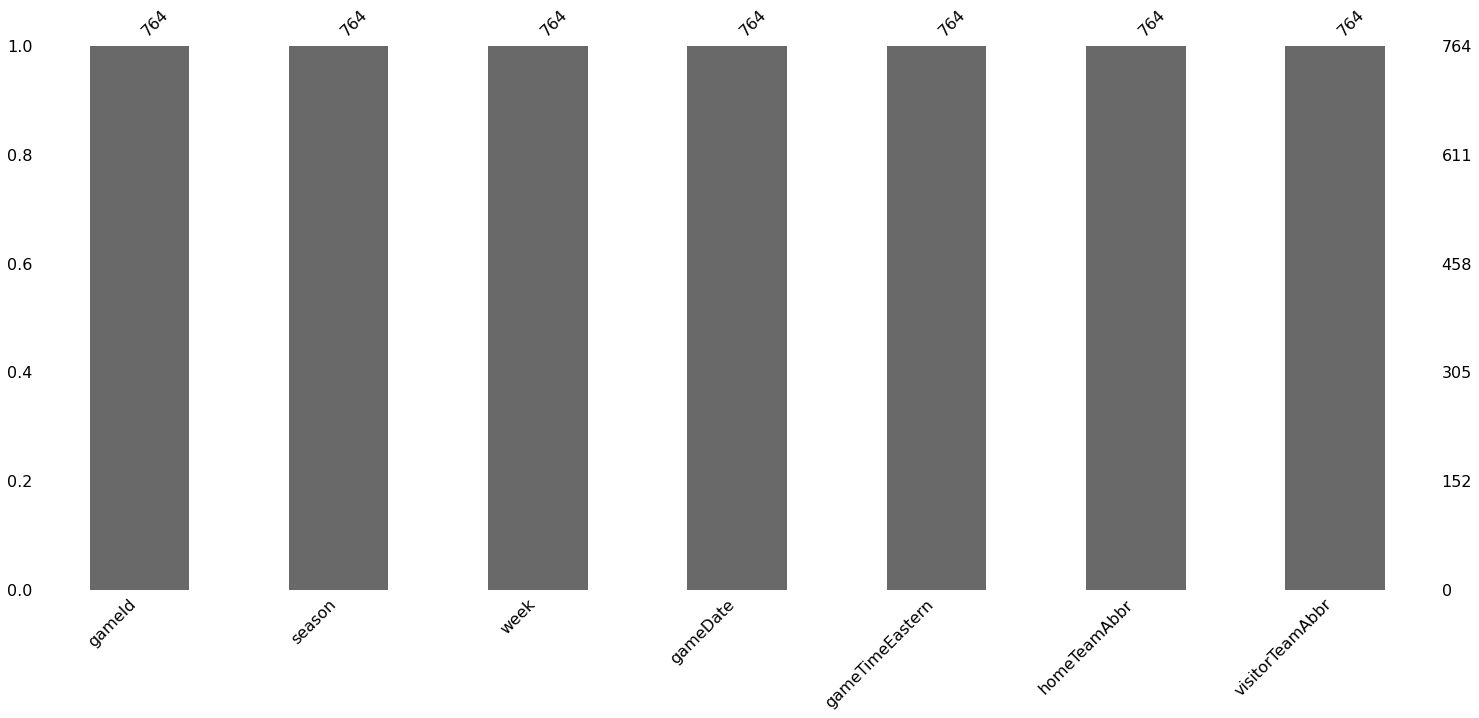

In [52]:
fig=plt.figure(figsize=(6,5))
msno.bar(games)
plt.show()

# *Players Dataset*

In [8]:
def bar_plot(col,df,cond,title):
  plt.figure(figsize=(10,8))
  sb.countplot(y=col,data=df,order=cond,palette='coolwarm_r')
  plt.title(title,fontsize=16)
  plt.show()

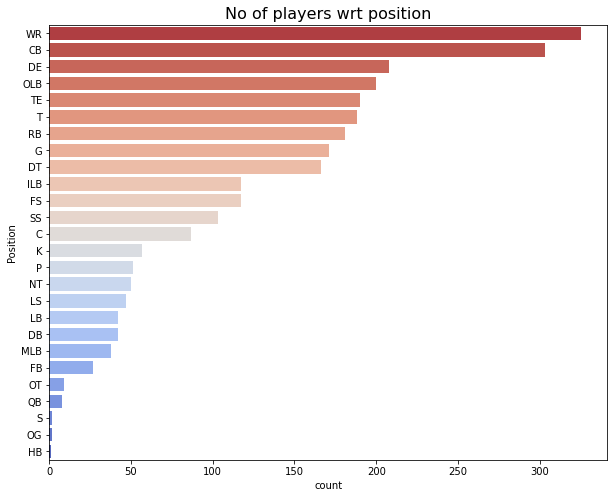

In [9]:
con=players['Position'].value_counts().index
bar_plot('Position',players,con,'No of players wrt position')

In [12]:
players['birthDate']=pd.to_datetime(players['birthDate']).dt.year

In [16]:
players['height']=players['height'].str.split('-').str[0].astype(int)

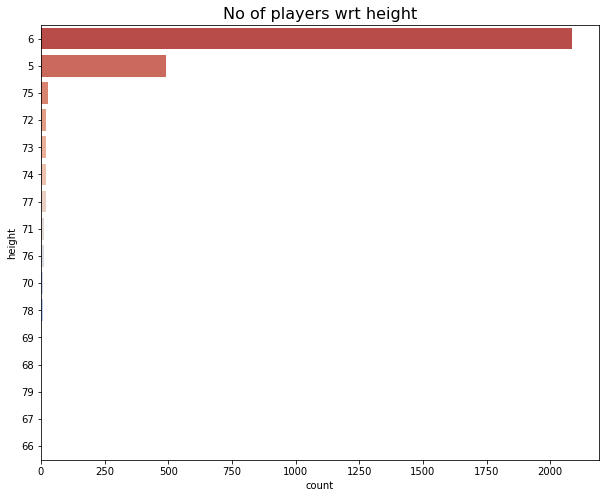

In [17]:
con_1=players['height'].value_counts().index
bar_plot('height',players,con_1,'No of players wrt height')

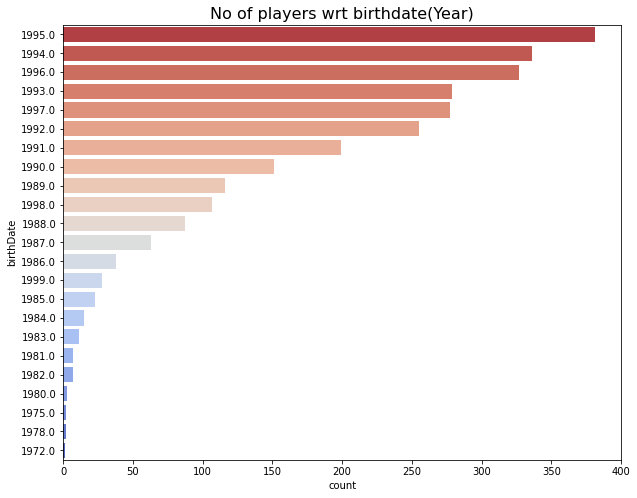

In [18]:
#players['birthDate'].value_counts()
con_2=players['birthDate'].value_counts().index
bar_plot('birthDate',players,con_2,'No of players wrt birthdate(Year)')

In [19]:
players.loc[players['height']>6  & (players['height']>70)]

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6,208,1992.0,James Madison,SS,Dean Marlowe
1,43501,6,220,1994.0,Central Michigan,FS,Kavon Frazier
2,43534,6,205,1993.0,Illinois,SS,Clayton Fejedelem
3,43535,6,235,1992.0,Temple,MLB,Tyler Matakevich
4,44174,6,236,1993.0,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6,320,1986.0,Central Florida,G,Josh Sitton
2728,33184,6,265,1985.0,Winston-Salem State,DE,William Hayes
2729,45651,5,198,1993.0,Iowa,WR,Riley McCarron
2730,41284,73,230,1992.0,LSU,RB,Jeremy Hill


In [59]:
birth_height

birthDate
1972.0    72.000000
1975.0     5.000000
1978.0     6.000000
1980.0    29.000000
1981.0     5.857143
1982.0    15.714286
1983.0    17.272727
1984.0    14.800000
1985.0    20.913043
1986.0    20.210526
1987.0    13.253968
1988.0    14.344828
1989.0    12.344828
1990.0    11.675497
1991.0    13.703518
1992.0    11.737255
1993.0     9.949821
1994.0     8.824405
1995.0     7.430446
1996.0     6.605505
1997.0     6.036101
1998.0     5.710280
1999.0     5.821429
Name: height, dtype: float64

<Figure size 1440x720 with 0 Axes>

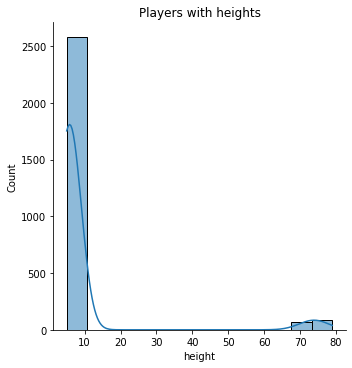

In [64]:
birth_height=players.groupby('birthDate')['height'].mean()
plt.figure(figsize=(20,10))
ax=sb.displot(data=players,x="height",kde=True)
plt.title('Players with heights')
plt.show()

<Figure size 1440x720 with 0 Axes>

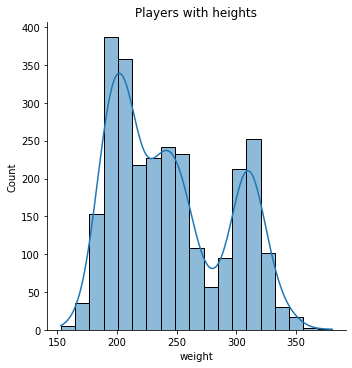

In [63]:
birth_weight=players.groupby('birthDate')['weight'].mean()
plt.figure(figsize=(20,10))
ax=sb.displot(data=players, x="weight",kde=True)
plt.title('Players with heights')
plt.show()

# *Plays Dataset*

In [65]:
import zipfile
zip_file=zipfile.ZipFile('plays.csv.zip')
plays=pd.read_csv(zip_file.open('plays.csv'))
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


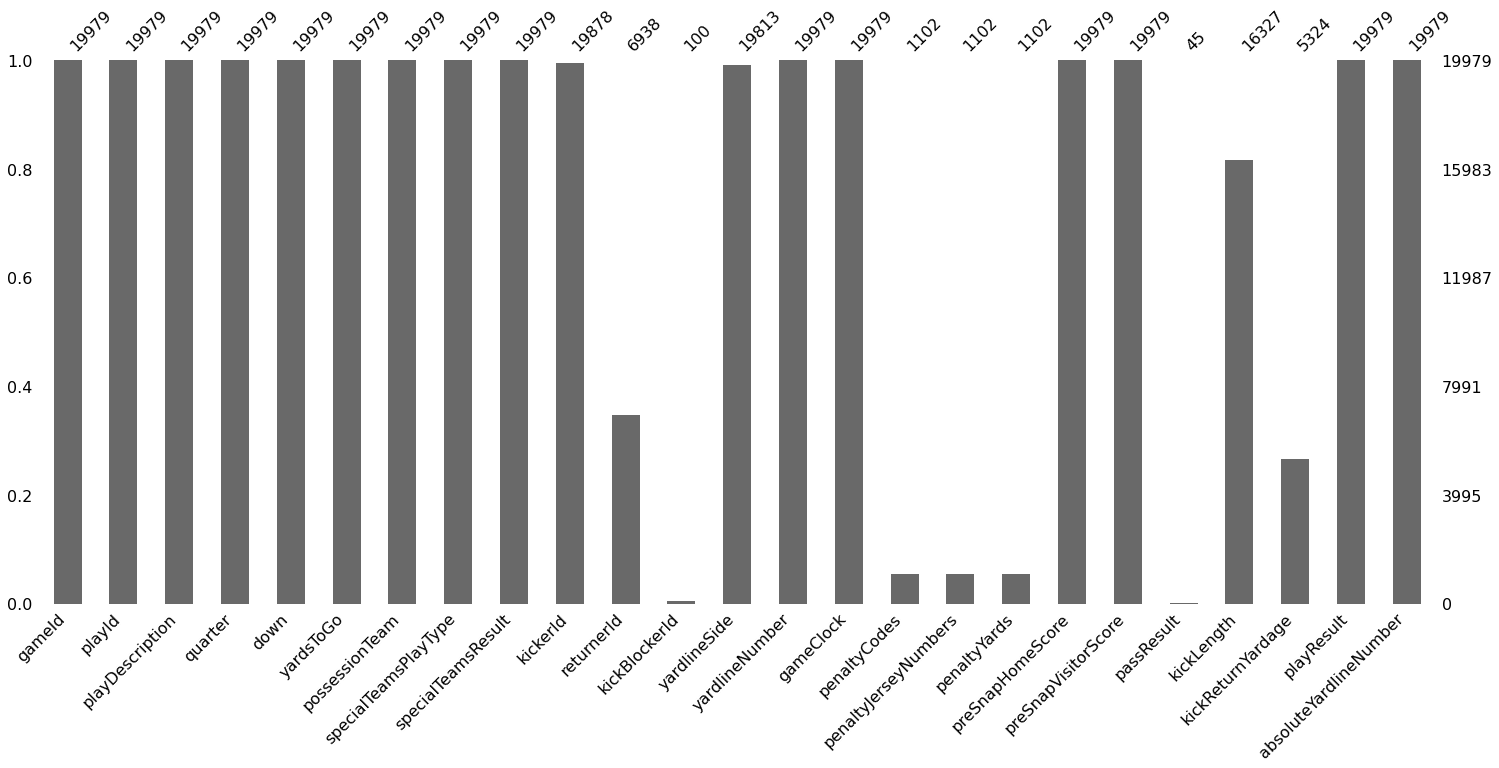

In [27]:
import missingno as msno
plt.figure(figsize=(9,6))
msno.bar(plays)
plt.show()

In [66]:
# percentage above the bar
def percent(ax,size):
  for patch in ax.patches:
    height = patch.get_height() # Figure height (number of data)
    width = patch.get_width() # Figure width
    x = patch.get_x() # The x-axis position on the left edge of the figure
    y = patch.get_y() 
    
    percent=(height/size)*100
    # Type text in the (x, y) coordinates
    ax.text(x+width/2,
        y+height*1.01,
            #s=f'{percent:1.1f}%', # Text
            s=f'{percent:1.1f}%',
            ha='center')
    
          

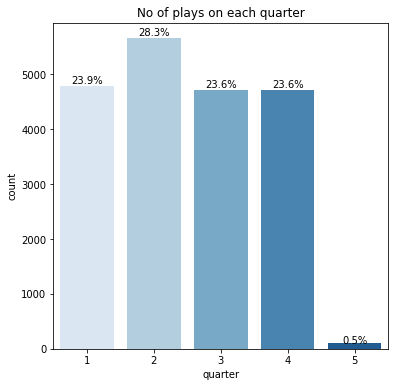

In [31]:
fig=plt.figure(figsize=(6,6))
ax=sb.countplot(x='quarter',data=plays,palette='Blues')
ax.set_title('No of plays on each quarter')
percent(ax,plays.shape[0])

plt.show()

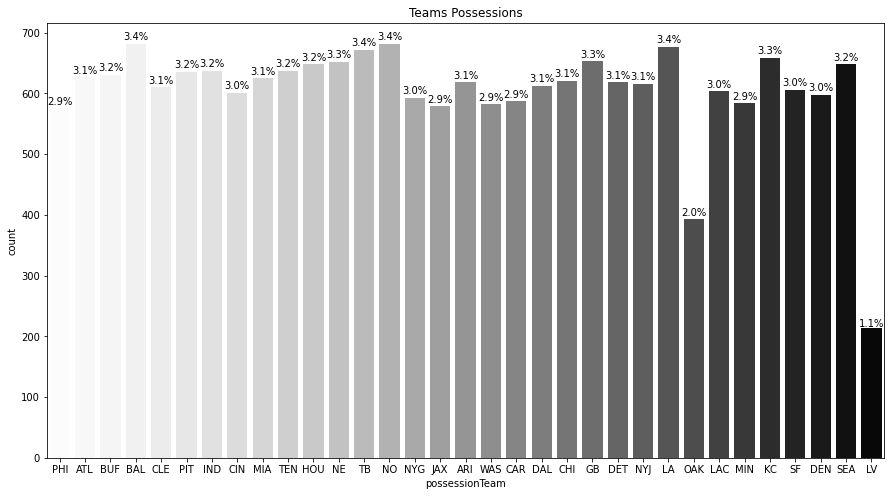

In [32]:
fig=plt.figure(figsize=(15,8))
ax_2=sb.countplot(x='possessionTeam',data=plays,palette='Greys')
ax_2.set_title('Teams Possessions',{'fontweight':16})
percent(ax_2,plays.shape[0])

plt.show()

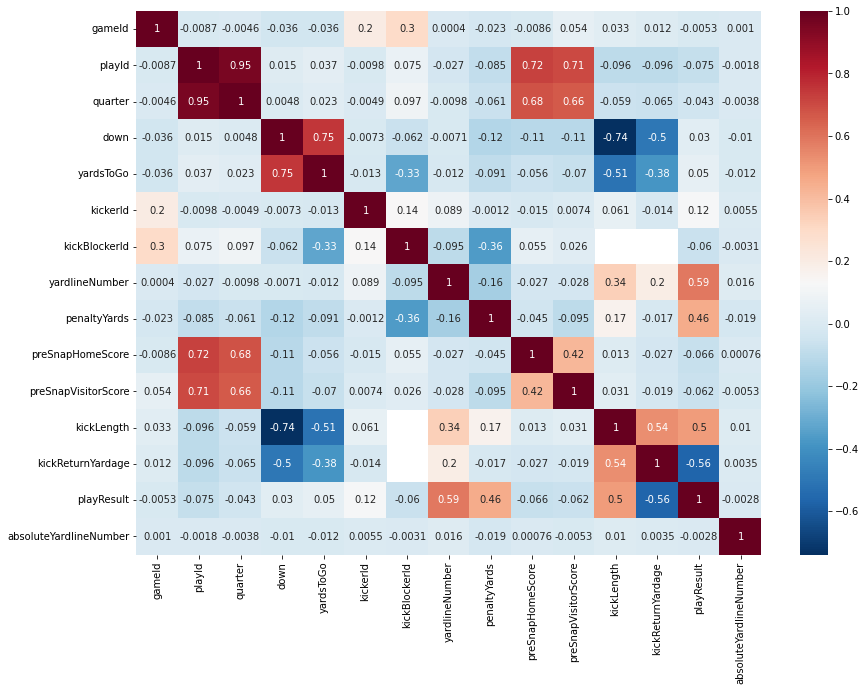

In [35]:
fig=plt.figure(figsize=(14,10))
corr=plays.corr('pearson')
sb.heatmap(corr,cmap='RdBu_r',annot=True)
plt.show()

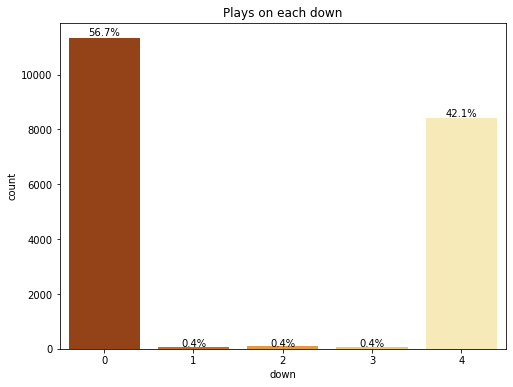

In [67]:
fig=plt.figure(figsize=(8,6))
ax_3=sb.countplot(x='down',data=plays,palette='YlOrBr_r')
percent(ax_3,plays.shape[0])
plt.title('Plays on each down',{'fontweight':5})
plt.show()

In [38]:
pass_result=plays[~plays['passResult'].isna()]
pass_result.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
1087,2018092309,2100,(:03) (Field Goal formation) J.Scott Aborted. ...,2,1,10,GB,Field Goal,Non-Special Teams Result,NaN,NaN,NaN,WAS,43,00:03:00,NaN,NaN,NaN,28,10,I,NaN,NaN,0,67
1251,2018092700,2608,(11:03) (Punt formation) J.Hekker pass incompl...,3,4,10,LA,Punt,Non-Special Teams Result,NaN,NaN,NaN,MIN,36,11:03:00,NaN,NaN,NaN,28,20,I,NaN,NaN,0,74
1594,2018093011,544,(6:59) (Punt formation) T.Hill pass short righ...,1,4,2,NO,Punt,Non-Special Teams Result,NaN,NaN,NaN,NO,33,06:59:00,NaN,NaN,NaN,7,0,C,NaN,NaN,10,43
1709,2018100700,1558,(5:10) (Field Goal formation) C.Bojorquez pass...,2,4,7,BUF,Field Goal,Non-Special Teams Result,NaN,NaN,NaN,TEN,12,05:10:00,NaN,NaN,NaN,7,3,I,NaN,NaN,0,98
3188,2018102810,1243,(8:29) (Punt formation) J.Hekker pass short ri...,2,4,3,LA,Punt,Non-Special Teams Result,NaN,NaN,NaN,LA,45,08:29:00,NaN,NaN,NaN,0,10,C,NaN,NaN,12,55


In [68]:
def pie_v(df,col,title):
  val=df[col].value_counts().values
  cat=df[col].value_counts().index
  fig,ax=plt.subplots(figsize =(10, 7))
  wedges,texts,autotexts=ax.pie(x=val,explode=[0,0.1,0.1,0],labels=cat,colors=['gold','wheat','yellowgreen','darkgoldenrod'],wedgeprops={'linewidth':2,'edgecolor':'k'},textprops={'fontweight':'bold','fontsize':17},autopct='%1.1f%%')
  ax.legend(wedges,cat,title="Passes",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1))
  plt.setp(autotexts,size=10,weight='bold')
  plt.title(title,fontdict={'fontweight':'bold'})
  plt.show()

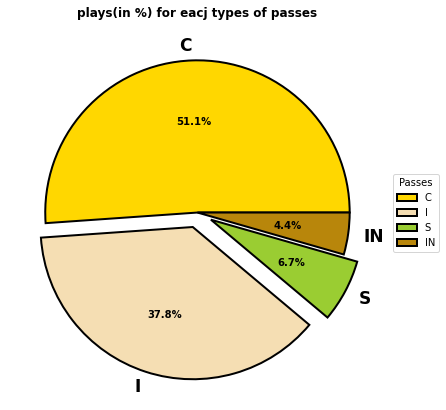

In [69]:
pie_v(pass_result,"passResult",'plays(in %) for eacj types of passes')

In [44]:
kick_length=plays[~plays['kickLength'].isna()]
team_kick_length=plays.groupby('possessionTeam')['kickLength'].max()
# plt.plot(plays.possessionTeam,plays.kickLength)
# plt.show()
team_kick_length_df=pd.DataFrame({'PossessionTeam':team_kick_length.index,'Max_kick_Length':team_kick_length.values})


In [45]:
team_kick_length_df_max=team_kick_length_df[team_kick_length_df['Max_kick_Length']>75.0]
team_kick_length_df_max

,PossessionTeam,Max_kick_Length
3,BUF,90.0
7,CLE,79.0
15,KC,88.0
19,MIA,80.0
21,NE,80.0
32,WAS,79.0


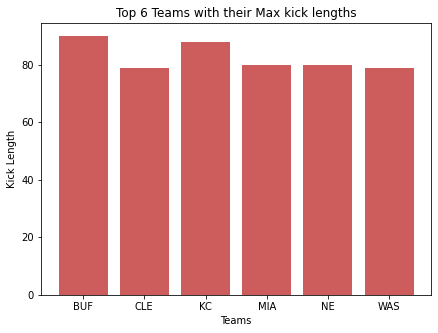

In [50]:
colors=['#FF00FF','#FF69B4','#CD5C5C','#4B0082','#FFFFF0','#F0E68C']
fig=plt.figure(figsize=(7,5))
plt.bar(x=team_kick_length_df_max.PossessionTeam,color='#CD5C5C',height=team_kick_length_df_max.Max_kick_Length)
plt.xlabel('Teams')
plt.ylabel('Kick Length')
plt.title('Top 6 Teams with their Max kick lengths')
plt.show()